# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from scipy.stats import linregress
import seaborn as sns
from sklearn.model_selection import KFold

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [3]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis'

In [4]:
path="C:\\Users\\Bauyrjan.Jyenis\\GuidedCapstone\\data"
os.chdir(path)

In [5]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\GuidedCapstone\\data'

In [6]:
os.listdir()

['clean_data.csv',
 'GuidedCapstone',
 'step2_output.csv',
 'step2_output_v1.0.csv',
 'step2_output_v1.1.csv',
 'step2_output_v1.2.csv',
 'step3_output.csv',
 'updated_ski_data.csv']

In [7]:
df = pd.read_csv('step3_output.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,0,0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,1,1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,2,2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,3,3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,4,4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [8]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [9]:
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [10]:
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [11]:
dfo = pd.DataFrame(df['state'])
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  330 non-null    object 
 1   summit_elev           330 non-null    int64  
 2   vertical_drop         330 non-null    int64  
 3   trams                 330 non-null    int64  
 4   fastEight             330 non-null    float64
 5   fastSixes             330 non-null    int64  
 6   fastQuads             330 non-null    int64  
 7   quad                  330 non-null    int64  
 8   triple                330 non-null    int64  
 9   double                330 non-null    int64  
 10  surface               330 non-null    int64  
 11  total_chairs          330 non-null    int64  
 12  Runs                  330 non-null    float64
 13  TerrainParks          330 non-null    float64
 14  LongestRun_mi         330 non-null    float64
 15  SkiableTerrain_ac     3

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [13]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

#### Let's write a function that standardizes the magnitude of numeric features, we will use this for multiple times

In [14]:
def stdz(x):
    # Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
    scaler = preprocessing.StandardScaler().fit(X)
    # Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X
    X_scaled=scaler.transform(X)
    return X_scaled

In [15]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend'] 

In [16]:
X_scaled = stdz(X)

## Split the data into training and testing datasets with K-Fold Cross Validation

In [17]:
# Let's create an instance that splits a dataset into 10 folds, shuffles prior to the split (hence set to "True"), and uses a value of 1 for pseudorandom number generator 
kfold = KFold(20, True, 1)
# enumerate splits
for train, test in kfold.split(X_scaled):
    X_train = X_scaled[train]
    X_test = X_scaled[test]
for train, test in kfold.split(y):
    y_train = y[train]
    y_test = y[test]

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [18]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

#### Let's write a function that splits the data set into training and testing data sets with traditional 75/25% ratio - WON'T BE USED in this exercise as K-Fold CV is preferred 

In [19]:
#def split_data(x, y):
    # Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
#    y = y.ravel()
    # Call the train_test_split() function with the first two parameters set to X_scaled and y 
    # Declare four variables, X_train, X_test, y_train and y_test separated by commas 
#    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
#    return X_train, X_test, y_train, y_test

In [20]:
#X_train, X_test, y_train, y_test = split_data(X_scaled, y)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [21]:
# all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [22]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model_1.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [23]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

#### Let's write a function that evaluate the prediction model based on explained variance score and mean absolute error, we will use this function multiple times

In [24]:
def evaluate(test, pred):
    evs = explained_variance_score(test, pred)
    print('Explained Variance Score: ', evs)
    print('\n')
    mae = mean_absolute_error(test, pred)
    print('Mean Absolute Error: ', mae)

In [25]:
evaluate(y_test, y_pred)

Explained Variance Score:  0.9183091092716075


Mean Absolute Error:  4.836314201347144


#### Given a high R-Squared value, let's also cross validate with residual plot to see if coefficient estimates and/or predictions are biased.

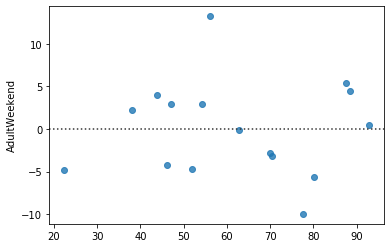

In [29]:
sns.residplot(y_pred, y_test)

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [26]:
model_1.intercept_

64.29717397704059

In [27]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).head(20)

,y_test,y_pred
37,89.00000,87.635065
71,39.00000,38.129205
72,40.00000,46.058893
129,17.00000,22.441705
133,46.00000,43.742486
144,48.00000,46.971002
156,89.00000,88.535455
178,55.00000,54.301080
203,67.00000,56.109674
235,64.16681,70.416315


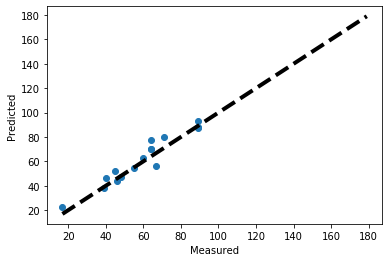

In [28]:
# Let's also plot it to visualize predicted values against actual values
# more info here https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [30]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False).head(12)

,Coefficient
state_New York,1.125367e+13
state_Michigan,1.062041e+13
state_Colorado,9.357195e+12
state_California,9.156888e+12
state_Pennsylvania,8.738079e+12
state_New Hampshire,8.057194e+12
state_Wisconsin,8.057194e+12
state_Vermont,7.813757e+12
state_Minnesota,7.560779e+12
state_Utah,7.297268e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

In [31]:
df_new=df.loc[:, ~df.columns.str.contains('state')]

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   summit_elev        330 non-null    int64  
 2   vertical_drop      330 non-null    int64  
 3   trams              330 non-null    int64  
 4   fastEight          330 non-null    float64
 5   fastSixes          330 non-null    int64  
 6   fastQuads          330 non-null    int64  
 7   quad               330 non-null    int64  
 8   triple             330 non-null    int64  
 9   double             330 non-null    int64  
 10  surface            330 non-null    int64  
 11  total_chairs       330 non-null    int64  
 12  Runs               330 non-null    float64
 13  TerrainParks       330 non-null    float64
 14  LongestRun_mi      330 non-null    float64
 15  SkiableTerrain_ac  330 non-null    float64
 16  Snow Making_ac     330 non

In [33]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df_new.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_new['AdultWeekend'] 

In [34]:
# Let's standardize the magnitude by calling stdx() function we have written above
X_scaled = stdz(X)

In [35]:
# Let's create an instance that splits a dataset into 10 folds, shuffles prior to the split (hence set to "True"), and uses a value of 1 for pseudorandom number generator 
kfold = KFold(20, True, 1)
# enumerate splits
for train, test in kfold.split(X_scaled):
    X_train = X_scaled[train]
    X_test = X_scaled[test]
for train, test in kfold.split(y):
    y_train = y[train]
    y_test = y[test]

In [36]:
# Let's split data by calling split_data() function we have written above
# X_train, X_test, y_train, y_test = split_data(X_scaled, y)

In [37]:
model_2 = lm.fit(X_train,y_train)

In [38]:
y_pred = model_2.predict(X_test)

In [39]:
evaluate(y_test, y_pred)

Explained Variance Score:  0.9302260962768125


Mean Absolute Error:  5.194251475591656


In [40]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False).head(12)

,Coefficient
AdultWeekday,19.801582
clusters,5.959264
summit_elev,3.942262
Runs,1.419829
vertical_drop,1.405134
fastQuads,1.330348
surface,1.241510
quad,1.099379
daysOpenLastYear,0.987872
NightSkiing_ac,0.961033


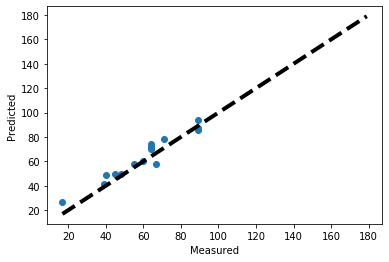

In [41]:
# Let's also plot it to visualize predicted values against actual values
# more info here https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   summit_elev        330 non-null    int64  
 2   vertical_drop      330 non-null    int64  
 3   trams              330 non-null    int64  
 4   fastEight          330 non-null    float64
 5   fastSixes          330 non-null    int64  
 6   fastQuads          330 non-null    int64  
 7   quad               330 non-null    int64  
 8   triple             330 non-null    int64  
 9   double             330 non-null    int64  
 10  surface            330 non-null    int64  
 11  total_chairs       330 non-null    int64  
 12  Runs               330 non-null    float64
 13  TerrainParks       330 non-null    float64
 14  LongestRun_mi      330 non-null    float64
 15  SkiableTerrain_ac  330 non-null    float64
 16  Snow Making_ac     330 non

#### Model 3

In [43]:
df_new = df_new.drop(['summit_elev', 'vertical_drop'], axis=1)

In [44]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df_new.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df_new['AdultWeekend'] 

In [45]:
# Let's standardize the magnitude by calling stdx() function we have written above
X_scaled = stdz(X)

In [46]:
# Let's create an instance that splits a dataset into 10 folds, shuffles prior to the split (hence set to "True"), and uses a value of 1 for pseudorandom number generator 
kfold = KFold(20, True, 1)
# enumerate splits
for train, test in kfold.split(X_scaled):
    X_train = X_scaled[train]
    X_test = X_scaled[test]
for train, test in kfold.split(y):
    y_train = y[train]
    y_test = y[test]

In [47]:
# Let's split data by calling split_data() function we have written above
# X_train, X_test, y_train, y_test = split_data(X_scaled, y)

In [48]:
model_3 = lm.fit(X_train,y_train)

In [49]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False).head(12)

,Coefficient
total_chairs,1.330612e+14
fastQuads,5.044378e+13
surface,4.726204e+13
double,4.164906e+13
triple,3.715382e+13
quad,3.011180e+13
fastSixes,1.495409e+13
trams,1.284897e+13
fastEight,1.263179e+12
AdultWeekday,2.008679e+01


In [50]:
y_pred = model_3.predict(X_test)

In [51]:
evaluate(y_test, y_pred)

Explained Variance Score:  0.9180361302781919


Mean Absolute Error:  5.544891893909239


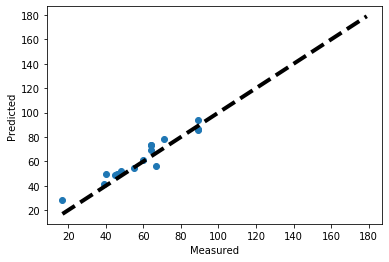

In [52]:
# Let's also plot it to visualize predicted values against actual values
# more info here https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Given a high R-Squared value, let's also cross validate with residual plot to see if coefficient estimates and/or predictions are biased.

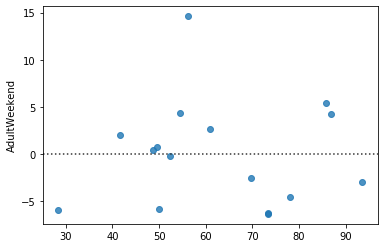

In [54]:
sns.residplot(y_pred, y_test)

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0.92 | 4.83 |-|
| Model 2. | 0.93 | 5.19 |'state'|
| Model 3. | 0.92 | 5.54 |'state','summit_elev','vertical_drop'|

Model Selection: Model 3 